## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

## Exploratory Data Analysis

In [3]:
# Features: 
# (1) PassengerId: Unique Id of a passenger
# (2)survival: Whether a passenger survived or not; 1 if survived and 0 if not.
# (3) pclass: Ticket class
# (4) sex: Sex
# (5) Age: Age in years
# (6) sibsp: # of siblings / spouses aboard the Titanic
# (7) parch: # of parents / children aboard the Titanic
# (8) ticket: Ticket number
# (9) fare: Passenger fare
# (10) cabin: Cabin number
# (11) embarked: Port of Embarkation

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
# survival rate in the sample
df_train['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Survivors vs Deads')

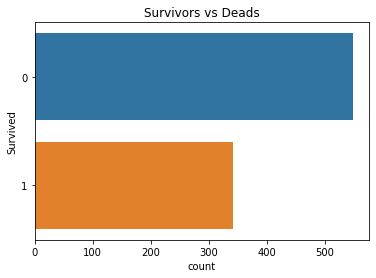

In [5]:
sns.countplot(y=df_train['Survived']).set_title('Survivors vs Deads')

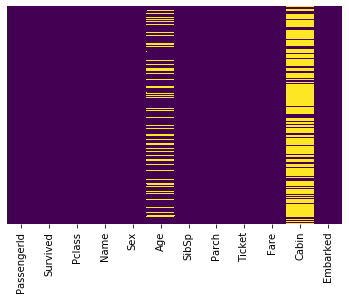

In [6]:
# first look for missing value
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

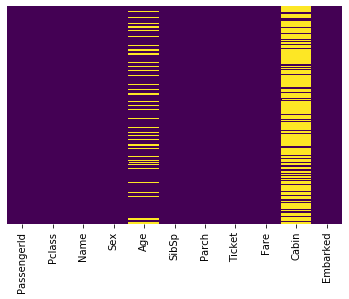

In [7]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Q1: Embarked vs Survival?

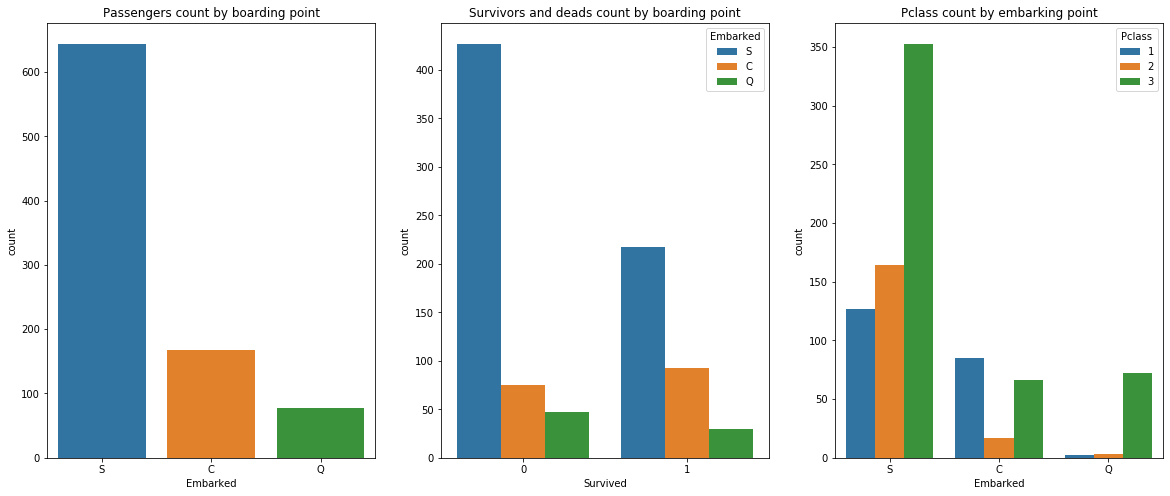

In [8]:
fig, axarr = plt.subplots(1,3,figsize=(20,8))
sns.countplot(df_train['Embarked'], ax=axarr[0]).set_title('Passengers count by boarding point') # countplot is suitable for categorical variables
p = sns.countplot(x = 'Survived', hue = 'Embarked', data = df_train, 
                  ax=axarr[1]).set_title('Survivors and deads count by boarding point')
g=sns.countplot(data=df_train, x='Embarked', hue='Pclass',ax=axarr[2]).set_title('Pclass count by embarking point')

# seems Cherbourg has a higher survival rate, but C also has the highest first class rate.

### Q2: Gender vs Survival?

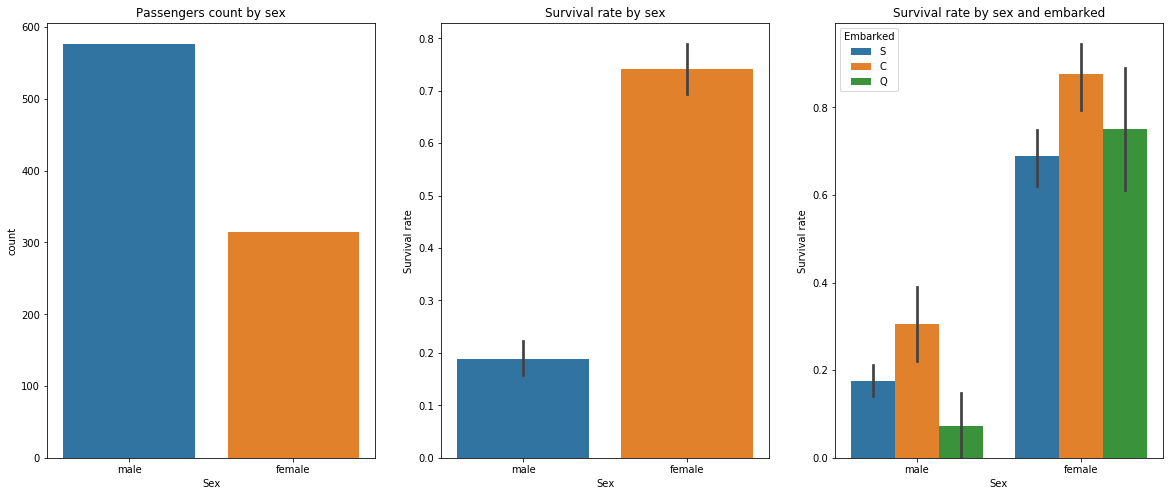

In [9]:
fig, axarr = plt.subplots(1, 3, figsize=(20,8))
a = sns.countplot(df_train['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=df_train, ax=axarr[1]).set_ylabel('Survival rate')
ax=axarr[2].set_title('Survival rate by sex and embarked')
c= sns.barplot(x='Sex', hue= 'Embarked', y='Survived', data=df_train).set_ylabel('Survival rate')

In [10]:
df_train.groupby('Sex').Survived.mean()
# seems gender is an important factor for survival rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

### Q3: Pclass vs Survival?

In [11]:
df_train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [13]:
df_train.groupby(['Pclass','Sex']).Survived.mean()
# impressive survival rate for first & second class women

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

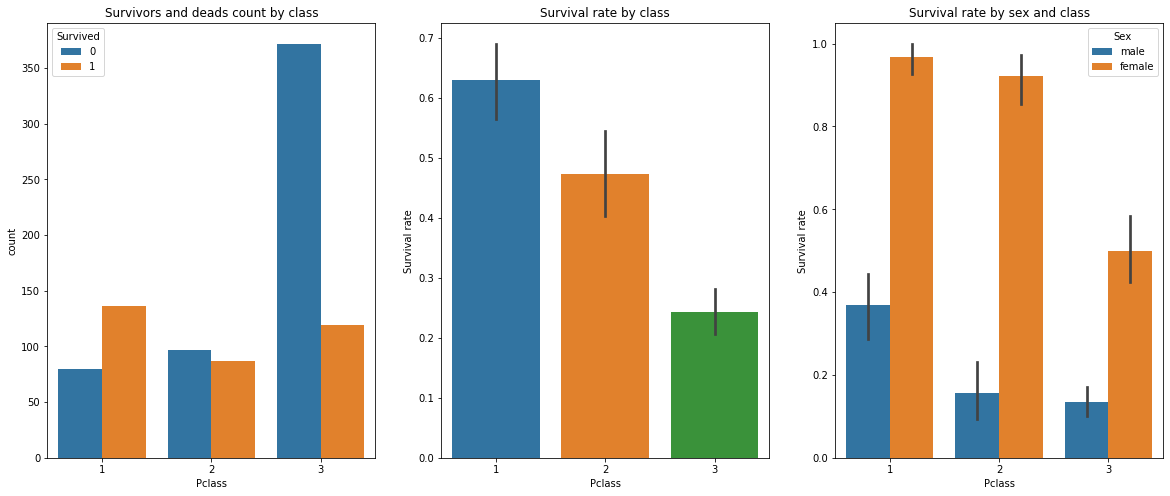

In [12]:
fig, axarr = plt.subplots(1,3,figsize=(20,8))
a = sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=axarr[0]).set_title('Survivors and deads count by class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=df_train, ax=axarr[1]).set_ylabel('Survival rate')
axarr[2].set_title('Survival rate by sex and class')
c= sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train).set_ylabel('Survival rate')

### Q4: Age vs Survival?

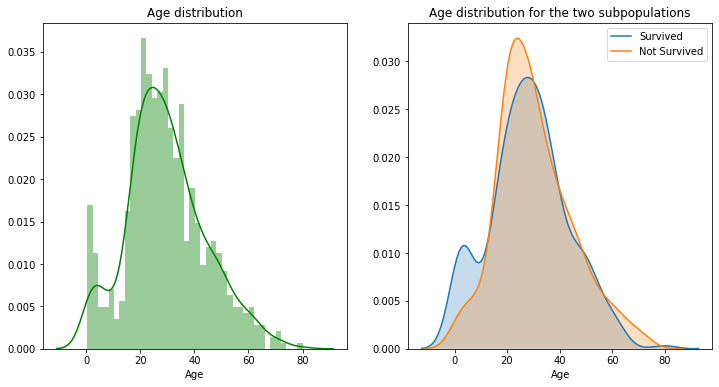

In [15]:
# first look at the dist of Age, ingore missing value for now
fig, axarr = plt.subplots(1,2,figsize=(12,6))
axarr[0].set_title('Age distribution')
a = sns.distplot(df_train['Age'], color='g', bins=40, ax=axarr[0])
axarr[1].set_title('Age distribution for the two subpopulations')
b = sns.kdeplot(df_train['Age'].loc[df_train['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
c = sns.kdeplot(df_train['Age'].loc[df_train['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')
# no clear relationship found here

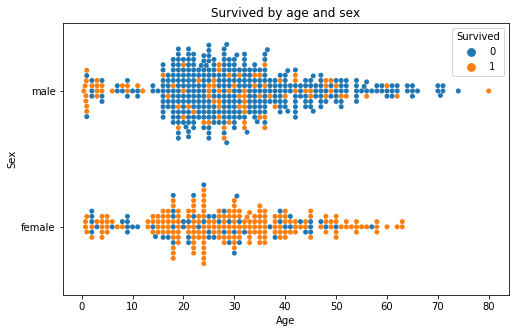

In [16]:
plt.figure(figsize=(8,5))
g = sns.swarmplot(y='Sex', x='Age', hue='Survived', data=df_train).set_title('Survived by age and sex')
# number of male survivors had less than 15 years old, while the female group has no this pattern

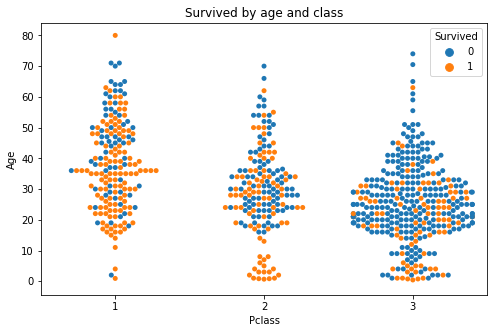

In [13]:
plt.figure(figsize=(8,5))
h = sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=df_train).set_title('Survived by age and class')
# no clear pattern 

### Q5: Fare vs Survival?

In [14]:
# Fare is highly related to Pclass, first look at dist of Fare
df_train['Fare'].describe() # the min value has 0, it looks wired

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
# take a further look at passengers with 0 fare
df_train.loc[df_train.Fare==0] 
# It shows these people are not children that might have traveled for free(won the tickets?), but Ithink that the zero-Fares might confuse the algorithm

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


## Feature Engineering

### Remove Zero Fares

In [16]:
index_1 = df_train[df_train['Fare'] == 0].index
df_train.drop(index_1, inplace=True)

In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Create 'Title' Variable to Instead 'Name' Variable

In [18]:
df_train['Title'] = df_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_test['Title'] = df_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_train['Title'].value_counts()

Mr              503
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
the Countess      1
Sir               1
Capt              1
Ms                1
Don               1
Mme               1
Lady              1
Name: Title, dtype: int64

In [23]:
df_test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [19]:
# Substitute rare female titles
df_train['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
df_test['Title'].replace(['Mme', 'Ms', 'Lady', 'Mlle', 'the Countess', 'Dona'], 'Miss', inplace=True)
# Substitute rare male titles
df_train['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)
df_test['Title'].replace(['Major', 'Col', 'Capt', 'Don', 'Sir', 'Jonkheer'], 'Mr', inplace=True)

In [20]:
df_train.groupby('Title').Survived.mean()

Title
Dr        0.428571
Master    0.575000
Miss      0.707447
Mr        0.162745
Mrs       0.792000
Rev       0.000000
Name: Survived, dtype: float64

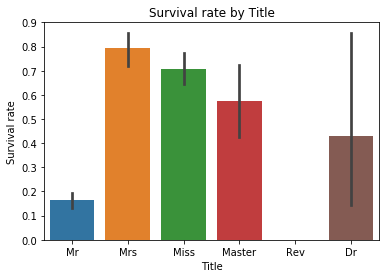

In [21]:
plt.title('Survival rate by Title')
a = sns.barplot(x='Title', y='Survived', data=df_train).set_ylabel('Survival rate')

### Combined 'SibSp' & 'Parch' to Create a New Feature

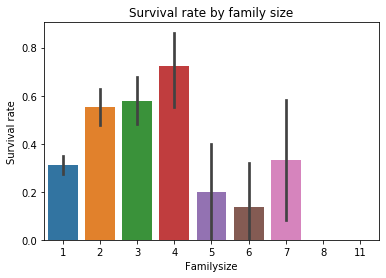

In [22]:
# The features SibSp and Parch capture the number of parents / children / siblings that the passengers have travelled with. 
# Since 'SibSp' & 'Parch' are two seemingly weak predictors, one thing we can do is combine them to get a stronger one.
# Creation of a new Fam_size column

df_train['Familysize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['Familysize'] = df_test['SibSp'] + df_test['Parch'] + 1
plt.title('Survival rate by family size')
ga = sns.barplot(x='Familysize', y='Survived', data=df_train).set_ylabel('Survival rate')

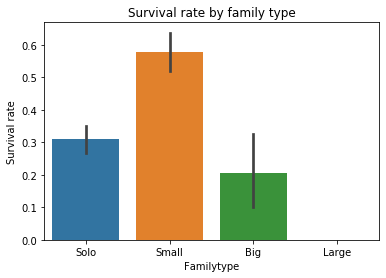

In [23]:
# Creation of four groups
df_train['Familytype'] = pd.cut(df_train.Familysize, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Large'])
df_test['Familytype'] = pd.cut(df_test.Familysize, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Large'])
plt.title('Survival rate by family type')
b = sns.barplot(x=df_train.Familytype, y=df_train.Survived).set_ylabel('Survival rate')

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  Title        418 non-null    object  
 12  Familysize   418 non-null    int64   
 13  Familytype   418 non-null    category
dtypes: category(1), float64(2), int64(5), object(6)
memory usage: 43.2+ KB


### Dealing With Missing Value

In [25]:
# fill in mmissing ages
# group number of features to indicate missing ages is more accurate
# group 'Pclass','Title','Age','Sex'
grp = df_train.groupby(['Pclass','Sex','Title'])['Age'].mean()
print(grp)

Pclass  Sex     Title 
1       female  Dr        49.000000
                Miss      30.060000
                Mrs       40.882353
        male    Dr        42.000000
                Master     5.306667
                Mr        42.505435
2       female  Miss      22.560606
                Mrs       33.682927
        male    Dr        38.500000
                Master     2.258889
                Mr        32.768293
                Rev       43.166667
3       female  Miss      16.123188
                Mrs       33.515152
        male    Master     5.350833
                Mr        28.662222
Name: Age, dtype: float64


In [26]:
grp = df_train.groupby(['Pclass','Sex','Title'])['Age'].mean().reset_index()[['Sex', 'Pclass', 'Title', 'Age']]

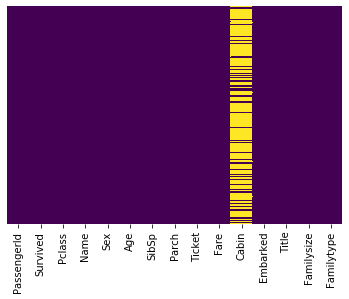

In [27]:
def fill_age(x):
    return grp[(grp.Pclass==x.Pclass)&(grp.Sex==x.Sex)&(grp.Title==x.Title)]['Age'].values[0]
df_train['Age'], df_test['Age'] = [df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1) for df in [df_train, df_test]]
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis') 

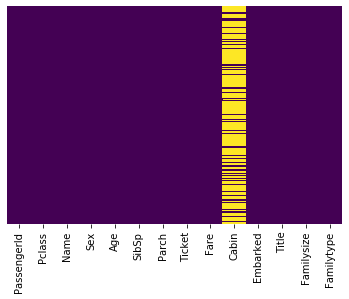

In [28]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
# fill in 2 missing Embarked value 
# check where is the missing value
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize,Familytype
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,1,Solo
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,1,Solo


In [30]:
df_test[df_test['Embarked'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize,Familytype


In [31]:
# As more than 70% of the people boarded from Southampton and more than 50% of the Pclass 1 boarded from Southampton 
# Fill in the most common category S
df_train['Embarked'].fillna('S', inplace=True)

In [32]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize,Familytype
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,1,Solo


In [33]:
#Fare is highly related to Pclass, use Pclass 3 median to replace NA in the test data
df_test.groupby('Pclass')['Fare'].median()
df_test['Fare'].fillna(7.8958,inplace=True)
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize,Familytype


## Drop less important features

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  876 non-null    int64   
 1   Survived     876 non-null    int64   
 2   Pclass       876 non-null    int64   
 3   Name         876 non-null    object  
 4   Sex          876 non-null    object  
 5   Age          876 non-null    float64 
 6   SibSp        876 non-null    int64   
 7   Parch        876 non-null    int64   
 8   Ticket       876 non-null    object  
 9   Fare         876 non-null    float64 
 10  Cabin        201 non-null    object  
 11  Embarked     876 non-null    object  
 12  Title        876 non-null    object  
 13  Familysize   876 non-null    int64   
 14  Familytype   876 non-null    category
dtypes: category(1), float64(2), int64(6), object(6)
memory usage: 143.7+ KB


In [35]:
# 'PassengerID' looks meaningless to survival
# Drop 'Name','SibSp','Parch','Ticket','Fam_size','Familysize' as we carate new features to instead of them
# Drop 'Cabin' as it has too many missing values and no logic relationships with survival

df_train.drop(['Name','SibSp','Parch','Ticket','Familysize','Cabin','PassengerId'], axis=1,inplace=True)
df_test.drop(['Name','SibSp','Parch','Ticket','Familysize','Cabin'], axis=1,inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Familytype
0,0,3,male,22.0,7.2500,S,Mr,Small
1,1,1,female,38.0,71.2833,C,Mrs,Small
2,1,3,female,26.0,7.9250,S,Miss,Solo
3,1,1,female,35.0,53.1000,S,Mrs,Small
4,0,3,male,35.0,8.0500,S,Mr,Solo


In [36]:
# check to see it works
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    object  
 3   Age          418 non-null    float64 
 4   Fare         418 non-null    float64 
 5   Embarked     418 non-null    object  
 6   Title        418 non-null    object  
 7   Familytype   418 non-null    category
dtypes: category(1), float64(2), int64(2), object(3)
memory usage: 23.6+ KB


### Convert Categorical Variables to Numerical

In [37]:
df_Embarked = pd.get_dummies(df_train['Embarked'],drop_first=True)
df_Title = pd.get_dummies(df_train['Title'],drop_first=True)
df_Sex = pd.get_dummies(df_train['Sex'],drop_first=True)
df_Fam = pd.get_dummies(df_train['Familytype'].astype('object'),drop_first=True)

In [38]:
df_Embarked_t = pd.get_dummies(df_test['Embarked'],drop_first=True)
df_Title_t = pd.get_dummies(df_test['Title'],drop_first=True)
df_Sex_t = pd.get_dummies(df_test['Sex'],drop_first=True)
df_Fam_t = pd.get_dummies(df_test['Familytype'].astype('object'),drop_first=True)

In [39]:
df_test.shape,df_train.shape

((418, 8), (876, 8))

In [40]:
df_train= pd.concat([df_Fam,df_Sex,df_Embarked,df_Title,df_train],axis=1)
df_test = pd.concat([df_Fam_t,df_Sex_t,df_Embarked_t,df_Title_t,df_test],axis=1)

In [41]:
df_test.shape,df_train.shape

((418, 19), (876, 19))

In [42]:
# drop the categorical variables columns
df_train.drop(['Embarked','Title','Sex','Familytype'],axis=1,inplace=True)
df_test.drop(['Embarked','Title','Sex','Familytype'],axis=1,inplace=True)

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Large        418 non-null    uint8  
 1   Small        418 non-null    uint8  
 2   Solo         418 non-null    uint8  
 3   male         418 non-null    uint8  
 4   Q            418 non-null    uint8  
 5   S            418 non-null    uint8  
 6   Master       418 non-null    uint8  
 7   Miss         418 non-null    uint8  
 8   Mr           418 non-null    uint8  
 9   Mrs          418 non-null    uint8  
 10  Rev          418 non-null    uint8  
 11  PassengerId  418 non-null    int64  
 12  Pclass       418 non-null    int64  
 13  Age          418 non-null    float64
 14  Fare         418 non-null    float64
dtypes: float64(2), int64(2), uint8(11)
memory usage: 17.7 KB


## Train a Model

In [44]:
from sklearn.model_selection import train_test_split
X = df_train.drop('Survived',axis=1)
y = df_train['Survived']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [47]:
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [49]:
classifers = {
    "Dummy":DummyClassifier(strategy='uniform',random_state=2),
    "KNN(3)":KNeighborsClassifier(),
    "Logistic_Regression": LogisticRegression(),
    "Decision_Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=29,n_estimators=180),
    "Neural_Net": MLPClassifier(hidden_layer_sizes=(100, 100, 100)),
    "AdaBoost": AdaBoostClassifier(),
    "Naives_Bayes": GaussianNB(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "SVC": SVC(C=4),
    "linearSVC": LinearSVC(),
    "LinearSVM": SVC(kernel='linear'),
    "Gaussian_Process": GaussianProcessClassifier(),
    "XGBClassifier": XGBClassifier(n_estimators=140,max_depth=4,min_child_weight=5,random_state=29,n_jobs=-1),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "CatBoostClassifier": CatBoostClassifier(silent=True),
    "LGBMClassifier": LGBMClassifier()
}

In [93]:
from time import time
nfast = 18 # numer of classifiers

head = list(classifers.items())[:nfast]

for name,classifier in head:
    start = time()
    classifier.fit(X_train,y_train)
    train_time = time() - start
    start = time()
    score = classifier.score(X_test,y_test)
    score_time = time() - start
    print("{:<15} | score = {:.3f} | time = {:,.3f}s | {:,.3f}s".format(name,score,train_time,score_time))

Dummy           | score = 0.502 | time = 0.001s | 0.000s
KNN(3)          | score = 0.791 | time = 0.002s | 0.008s
Logistic_Regression | score = 0.837 | time = 0.007s | 0.001s
Decision_Tree   | score = 0.688 | time = 0.001s | 0.000s
Random Forest   | score = 0.795 | time = 0.208s | 0.016s
Neural_Net      | score = 0.802 | time = 0.963s | 0.002s
AdaBoost        | score = 0.821 | time = 0.057s | 0.007s
Naives_Bayes    | score = 0.441 | time = 0.001s | 0.000s
QDA             | score = 0.471 | time = 0.001s | 0.001s
SVC             | score = 0.814 | time = 0.008s | 0.001s
linearSVC       | score = 0.829 | time = 0.019s | 0.000s
LinearSVM       | score = 0.837 | time = 0.003s | 0.001s
Gaussian_Process | score = 0.802 | time = 0.110s | 0.004s
XGBClassifier   | score = 0.806 | time = 0.034s | 0.001s
GradientBoostingClassifier | score = 0.825 | time = 0.067s | 0.001s
CatBoostClassifier | score = 0.814 | time = 1.113s | 0.004s
LGBMClassifier  | score = 0.817 | time = 0.028s | 0.001s


In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Large        418 non-null    uint8  
 1   Small        418 non-null    uint8  
 2   Solo         418 non-null    uint8  
 3   male         418 non-null    uint8  
 4   Q            418 non-null    uint8  
 5   S            418 non-null    uint8  
 6   Master       418 non-null    uint8  
 7   Miss         418 non-null    uint8  
 8   Mr           418 non-null    uint8  
 9   Mrs          418 non-null    uint8  
 10  Rev          418 non-null    uint8  
 11  PassengerId  418 non-null    int64  
 12  Pclass       418 non-null    int64  
 13  Age          418 non-null    float64
 14  Fare         418 non-null    float64
dtypes: float64(2), int64(2), uint8(11)
memory usage: 17.7 KB


In [51]:
# stacking all mdoels
from sklearn.ensemble import StackingClassifier
estimators = [
    ("Random Forest", RandomForestClassifier()),
    ("LinearSVM", SVC(kernel='linear')),
    ("Logistic_Regression", LogisticRegression()),
    ("AdaBoost", AdaBoostClassifier()),
    ("GradientBoostingClassifier", GradientBoostingClassifier()),
    ("CatBoostClassifier", CatBoostClassifier(silent=True)),
    ("Neural_Net", MLPClassifier(hidden_layer_sizes=(30, 30, 30))),
    ("LGBMClassifier", LGBMClassifier())]
stack_gen = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression())
model_stack =stack_gen.fit(X_train,y_train)

In [52]:
model_stack.score(X_test,y_test)

0.8326996197718631

In [53]:
test = scaler.transform(df_test.loc[:, df_test.columns != 'PassengerId'])
model_stack_pred = model_stack.predict(test)
lg = LogisticRegression()
model_lg = lg.fit(X_test,y_test)
model_lg_pred = model_lg.predict(test)

In [54]:
# cross_validation
from sklearn.model_selection import cross_val_score
cross_val_score(lg,X,y, cv=3)

array([0.81849315, 0.83219178, 0.82876712])

In [55]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
# Create regularization penalty space
penalty = ['l1', 'l2', 'elasticnet', 'none']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10,15)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(lg, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(X_train,y_train)
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# cross_validation
cross_val_score(clf,X,y, cv=3)

Best Penalty: l2
Best C: 1.0


array([0.80821918, 0.83561644, 0.82876712])

In [56]:
# Predict using best model
best_model_pred = best_model.predict(df_test.loc[:, df_test.columns != 'PassengerId'])

sub=pd.DataFrame({
    'PassengerId':df_test['PassengerId'],
    'Survived':best_model.predict(test)
})
sub.shape

(418, 2)

In [57]:
sub.to_csv('Titanic_submission.csv',index=False)